<a href="https://colab.research.google.com/github/noahfavreau/nasa-space-apps-2025/blob/main/src/model/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import pandas as pd
import missingno
import requests
import os
import math

In [2]:
def does_file_exists():
  if os.path.exists("koi_dataset.csv") is False:

    data = {
        'workspace': '2025.09.16_10.59.53_025532/TblView/2025.10.04_07.13.21_034286',
        'useTimestamp': '1',
        'table': '/exodata/kvmexoweb/ExoTables/cumulative.tbl',
        'format': 'CSV',
        'user': '',
        'label': '',
        'columns': 'kepid_display,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period_str,koi_time0bk_str,koi_impact_str,koi_duration_str,koi_depth_str,koi_prad_str,koi_teq_str,koi_insol_str,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff_str,koi_slogg_str,koi_srad_str,ra,dec,koi_kepmag',
        'rows': 'both',
        'mission': 'ExoplanetArchive',
    }

    koi_dataset = requests.post(
        'https://exoplanetarchive.ipac.caltech.edu/cgi-bin/IceTable/nph-iceTblDownload',
        data=data,
    )
    with open("koi_dataset.csv", "wb") as f:
      f.write(koi_dataset.content)

  if os.path.exists("toi_dataset.csv") is False:
    data = {
        'workspace': '2025.09.16_10.59.53_025532/TblView/2025.10.04_07.20.22_013969',
        'useTimestamp': '1',
        'table': '/exodata/kvmexoweb/ExoTables/TOI.tbl',
        'format': 'CSV',
        'user': '',
        'label': '',
        'columns': 'toi_display,tidstr,tfopwg_disp,rastr,decstr,st_pmrastr,st_pmdecstr,pl_tranmidstr,pl_orbperstr,pl_trandurhstr,pl_trandepstr,pl_radestr,pl_insolstr,pl_eqtstr,st_tmagstr,st_diststr,st_teffstr,st_loggstr,st_radstr,toi_created,rowupdate',
        'rows': 'both',
        'mission': 'ExoplanetArchive',
    }

    toi_dataset = requests.post(
        'https://exoplanetarchive.ipac.caltech.edu/cgi-bin/IceTable/nph-iceTblDownload',
        data=data,
    )
    with open("toi_dataset.csv", "wb") as f:
      f.write(toi_dataset.content)

  if os.path.exists("k2_dataset.csv") is False:
    data = {
        'workspace': '2025.09.16_10.59.53_025532/TblView/2025.10.04_07.21.51_016669',
        'useTimestamp': '1',
        'table': '/exodata/kvmexoweb/ExoTables/k2pandc.tbl',
        'format': 'CSV',
        'user': '',
        'label': '',
        'columns': 'pl_name_display,hostname,default_flag,disposition,disp_refname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbperstr,pl_orbsmaxstr,pl_radestr,pl_radjstr,pl_bmassestr,pl_bmassjstr,pl_bmassprov,pl_orbeccenstr,pl_insolstr,pl_eqtstr,ttv_flag,st_refname,st_spectype,st_teffstr,st_radstr,st_massstr,st_metstr,st_metratio,st_loggstr,sy_refname,rastr,decstr,sy_diststr,sy_vmagstr,sy_kmagstr,sy_gaiamagstr,rowupdate,pl_pubdate,releasedate',
        'rows': 'both',
        'mission': 'ExoplanetArchive',
    }

    k2_dataset = requests.post(
        'https://exoplanetarchive.ipac.caltech.edu/cgi-bin/IceTable/nph-iceTblDownload',
        data=data,
    )
    with open("k2_dataset.csv", "wb") as f:
      f.write(k2_dataset.content)


In [3]:
does_file_exists()
koi_dataset = pd.read_csv("koi_dataset.csv", comment="#", na_values=["NaN", "NULL", "-1"])
toi_dataset = pd.read_csv("toi_dataset.csv", comment="#", na_values=["NaN", "NULL", "-1"])
k2_dataset = pd.read_csv("k2_dataset.csv", comment="#", na_values=["NaN", "NULL", "-1"])

In [4]:
koi_dataset.head(10)
koi_dataset.tail(10)

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
9554,10079481,K08195.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,1,0,0,0,...,-186.0,4.382,0.096,-0.144,1.066,0.222,-0.148,293.56528,47.093620,11.976
9555,10081899,K08196.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,1,0,0,0,...,-41.0,4.939,0.044,-0.036,0.318,0.030,-0.037,294.46457,47.045441,15.279
9556,10199817,K08197.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.053,1,0,0,0,...,-229.0,4.073,0.385,-0.165,1.440,0.353,-0.529,288.39456,47.264351,12.152
9557,10205598,K08198.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.008,1,0,0,0,...,-141.0,4.574,0.078,-0.052,0.699,0.074,-0.066,290.93597,47.290730,14.911
9558,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,1,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9559,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,10155286,K07988.01,NaN,CANDIDATE,CANDIDATE,0.092,0,0,0,0,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998
9563,10156110,K07989.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,1,1,...,-225.0,4.385,0.054,-0.216,1.193,0.410,-0.137,297.00977,47.121021,14.826


In [5]:
toi_dataset.head(10)
toi_dataset.tail(10)

,toi,tid,tfopwg_disp,rastr,ra,decstr,dec,st_pmra,st_pmraerr1,st_pmraerr2,...,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_rad,st_raderr1,st_raderr2,st_radlim,toi_created,rowupdate
7693,990.01,88684250,PC,08h07m39.25s,121.913554,-05d46m12.28s,-5.770077,-3.806,0.088,-0.088,...,4.22,0.07,-0.07,0,1.860000,0.070000,-0.070000,0,2019-07-24 15:58:33,2023-04-04 16:02:02
7694,991.01,7561203,PC,07h37m23.08s,114.346166,-11d09m04.68s,-11.151301,-3.178,0.117,-0.117,...,4.18,0.08,-0.08,0,2.130000,0.110000,-0.110000,0,2019-07-24 15:58:33,2024-09-09 10:08:01
7695,992.01,108835813,FP,07h30m28.01s,112.616704,-26d04m50.46s,-26.080682,-2.927,0.061,-0.061,...,NaN,NaN,NaN,0,NaN,NaN,NaN,0,2019-07-24 15:58:33,2021-10-29 12:59:15
7696,993.01,259353953,PC,07h35m50.6s,113.960841,-15d29m58.04s,-15.499455,-9.483,0.058,-0.058,...,4.28,0.08,-0.08,0,1.670000,0.050000,-0.050000,0,2019-07-24 15:58:33,2023-07-12 16:02:01
7697,994.01,93963408,FP,07h40m11.12s,115.046333,-09d05m03.37s,-9.084269,-7.229,0.089,-0.089,...,4.32,0.07,-0.07,0,1.877390,0.078985,-0.078985,0,2019-07-24 15:58:33,2021-10-29 12:59:15
7698,995.01,317951248,FP,07h23m14.75s,110.811443,+05d33m46.26s,5.562850,2.061,0.405,-0.405,...,NaN,NaN,NaN,0,NaN,NaN,NaN,0,2019-07-24 15:58:33,2021-10-29 12:59:15
7699,996.01,142918609,FP,07h57m23.99s,119.349948,-19d30m57.65s,-19.516015,-3.900,0.848,-0.848,...,NaN,NaN,NaN,0,2.050000,NaN,NaN,0,2019-07-24 15:58:33,2021-10-29 12:59:15
7700,997.01,341729521,FP,08h05m16.69s,121.319521,-59d34m47.27s,-59.579798,-44.770,0.044,-0.044,...,4.52,0.08,-0.08,0,0.926261,0.045789,-0.045789,0,2019-07-24 15:58:33,2024-09-09 10:08:01
7701,998.01,54390047,FP,07h53m16.69s,118.319555,-14d13m07.76s,-14.218823,-1.706,0.069,-0.069,...,4.01,0.07,-0.07,0,2.349860,0.091578,-0.091578,0,2019-07-24 15:58:33,2024-09-09 10:08:01
7702,999.01,341186896,FP,07h55m27.38s,118.864086,-58d13m19.42s,-58.222060,-17.190,0.042,-0.042,...,4.35,0.09,-0.09,0,1.300000,0.050000,-0.050000,0,2019-07-24 15:58:33,2024-09-09 10:08:01


In [6]:
koi_dataset.shape
koi_dataset.columns
koi_dataset.info()
koi_dataset.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2747 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9.564000e+03,9564,2747,9564,9564,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9095.000000,9564.000000,9564.000000,9563.000000
unique,NaN,9564,2747,3,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,K07989.01,Kepler-1975 b,FALSE POSITIVE,FALSE POSITIVE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,1,4839,4847,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.690628e+06,NaN,NaN,NaN,NaN,0.480829,0.208595,0.232748,0.197512,0.120033,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394739,292.060163,43.810433,14.264606
std,2.653459e+06,NaN,NaN,NaN,NaN,0.476928,4.767290,0.422605,0.398142,0.325018,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168323,4.766657,3.601243,1.385448
min,7.574500e+05,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,5.556034e+06,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.249500,288.660770,40.777173,13.440000
50%,7.906892e+06,NaN,NaN,NaN,NaN,0.334000,0.000000,0.000000,0.000000,0.000000,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,9.873066e+06,NaN,NaN,NaN,NaN,0.998000,0.000000,0.000000,0.000000,0.000000,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000


In [7]:
k2_dataset.head(10)
k2_dataset.tail(10)

,pl_name,hostname,default_flag,disposition,disp_refname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
3994,WASP-85 A b,WASP-85 A,0,CONFIRMED,Mo&,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3995,WASP-85 A b,WASP-85 A,0,CONFIRMED,Mo&,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3996,WASP-85 A b,WASP-85 A,0,CONFIRMED,Mo&,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3997,WASP-85 A b,WASP-85 A,0,CONFIRMED,Mo&,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3998,WASP-85 A b,WASP-85 A,1,CONFIRMED,Mo&,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3999,WASP-85 A b,WASP-85 A,0,CONFIRMED,Mo&,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4000,Wolf 503 b,Wolf 503,1,CONFIRMED,Peterson et al. 2018,1.0,1.0,Transit,2018.0,K2,...,-0.03,7.617,0.023,-0.023,9.89816,0.000337,-0.000337,2022-05-23,2021-12,2022-05-23
4001,Wolf 503 b,Wolf 503,0,CONFIRMED,Peterson et al. 2018,1.0,1.0,Transit,2018.0,K2,...,-0.03,7.617,0.023,-0.023,9.89816,0.000337,-0.000337,2018-09-04,2018-11,2018-09-06
4002,Wolf 503 b,Wolf 503,0,CONFIRMED,Peterson et al. 2018,1.0,1.0,Transit,2018.0,K2,...,-0.03,7.617,0.023,-0.023,9.89816,0.000337,-0.000337,2023-04-17,2023-04,2023-04-17
4003,Wolf 503 b,Wolf 503,0,CONFIRMED,Peterson et al. 2018,1.0,1.0,Transit,2018.0,K2,...,-0.03,7.617,0.023,-0.023,9.89816,0.000337,-0.000337,2025-09-17,2017-07,2025-08-28


In [8]:
toi_dataset.shape
toi_dataset.columns
toi_dataset.info()
toi_dataset.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7703 entries, 0 to 7702
Data columns (total 65 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   toi              7703 non-null   float64
 1   tid              7703 non-null   int64  
 2   tfopwg_disp      7703 non-null   object 
 3   rastr            7703 non-null   object 
 4   ra               7703 non-null   float64
 5   decstr           7703 non-null   object 
 6   dec              7703 non-null   float64
 7   st_pmra          7569 non-null   float64
 8   st_pmraerr1      7569 non-null   float64
 9   st_pmraerr2      7568 non-null   float64
 10  st_pmralim       7569 non-null   float64
 11  st_pmdec         7569 non-null   float64
 12  st_pmdecerr1     7569 non-null   float64
 13  st_pmdecerr2     7568 non-null   float64
 14  st_pmdeclim      7569 non-null   float64
 15  pl_tranmid       7703 non-null   float64
 16  pl_tranmiderr1   7692 non-null   float64
 17  pl_tranmiderr2

,toi,tid,tfopwg_disp,rastr,ra,decstr,dec,st_pmra,st_pmraerr1,st_pmraerr2,...,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_rad,st_raderr1,st_raderr2,st_radlim,toi_created,rowupdate
count,7703.000000,7.703000e+03,7703,7703,7703.000000,7703,7703.000000,7569.000000,7569.000000,7568.000000,...,6847.000000,5432.000000,5432.000000,7703.0,7196.000000,5740.000000,5739.000000,7703.0,7703,7703
unique,NaN,NaN,6,7390,NaN,7400,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1940,893
top,NaN,NaN,PC,00h29m12.48s,NaN,-30d27m14.82s,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-17 00:30:12,2024-08-22 10:08:01
freq,NaN,NaN,4679,5,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106,2288
mean,3749.039313,2.455227e+08,NaN,NaN,179.804241,NaN,1.156538,-0.567223,0.228733,-0.228631,...,4.305269,0.174805,-0.174805,0.0,1.403747,0.074439,-0.074278,0.0,NaN,NaN
std,2152.357244,1.616968e+08,NaN,NaN,103.705905,NaN,47.465287,77.003956,0.632226,0.632206,...,0.304492,0.351881,0.351881,0.0,1.598079,0.082037,0.081129,0.0,NaN,NaN
min,101.010000,2.876000e+03,NaN,NaN,0.084680,NaN,-89.471513,-1624.050000,0.015000,-8.000000,...,0.100000,0.000391,-2.010840,0.0,0.114827,0.003357,-1.723020,0.0,NaN,NaN
25%,1861.510000,1.311389e+08,NaN,NaN,96.069552,NaN,-43.355251,-10.617000,0.038000,-0.079250,...,4.123720,0.080000,-0.092600,0.0,0.890000,0.050000,-0.080000,0.0,NaN,NaN
50%,3736.010000,2.499452e+08,NaN,NaN,161.156925,NaN,4.715116,-1.571000,0.051000,-0.051000,...,4.330000,0.084561,-0.084561,0.0,1.234340,0.060000,-0.060000,0.0,NaN,NaN
75%,5615.510000,3.540917e+08,NaN,NaN,283.061467,NaN,43.806822,8.258000,0.080000,-0.038000,...,4.500000,0.092600,-0.080000,0.0,1.660000,0.080000,-0.050000,0.0,NaN,NaN


In [9]:
koi_dataset.info()
print(koi_dataset.isnull().sum())
koi_dataset.info()
print(koi_dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2747 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [10]:
toi_dataset.info()
print(toi_dataset.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7703 entries, 0 to 7702
Data columns (total 65 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   toi              7703 non-null   float64
 1   tid              7703 non-null   int64  
 2   tfopwg_disp      7703 non-null   object 
 3   rastr            7703 non-null   object 
 4   ra               7703 non-null   float64
 5   decstr           7703 non-null   object 
 6   dec              7703 non-null   float64
 7   st_pmra          7569 non-null   float64
 8   st_pmraerr1      7569 non-null   float64
 9   st_pmraerr2      7568 non-null   float64
 10  st_pmralim       7569 non-null   float64
 11  st_pmdec         7569 non-null   float64
 12  st_pmdecerr1     7569 non-null   float64
 13  st_pmdecerr2     7568 non-null   float64
 14  st_pmdeclim      7569 non-null   float64
 15  pl_tranmid       7703 non-null   float64
 16  pl_tranmiderr1   7692 non-null   float64
 17  pl_tranmiderr2

In [11]:
k2_dataset.info()
print(k2_dataset.isnull().sum())
print(f"Total entries: {9563 + 7702 + 4003}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 94 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          4004 non-null   object 
 1   hostname         4004 non-null   object 
 2   default_flag     4004 non-null   int64  
 3   disposition      4004 non-null   object 
 4   disp_refname     4004 non-null   object 
 5   sy_snum          3987 non-null   float64
 6   sy_pnum          3987 non-null   float64
 7   discoverymethod  3987 non-null   object 
 8   disc_year        3987 non-null   float64
 9   disc_facility    3987 non-null   object 
 10  soltype          3987 non-null   object 
 11  pl_controv_flag  3987 non-null   float64
 12  pl_refname       3987 non-null   object 
 13  pl_orbper        3937 non-null   float64
 14  pl_orbpererr1    3052 non-null   float64
 15  pl_orbpererr2    3050 non-null   float64
 16  pl_orbperlim     3932 non-null   float64
 17  pl_orbsmax    

In [13]:
"""
1 = CONFIRMED
2 = CANDIDATE
3 = FALSE POSITIVE
"""
mapping = {
    "CONFIRMED": "1",
    "CANDIDATE": "2",
    "FALSE POSITIVE": "3"
}
for col in koi_dataset.columns:
    if "koi_disposition" in col.lower():
        koi_dataset[col] = koi_dataset[col].astype(str).map(mapping).fillna(koi_dataset[col])
    if "koi_pdisposition" in col.lower():
        koi_dataset[col] = koi_dataset[col].astype(str).map(mapping).fillna(koi_dataset[col])

koi_dataset.to_csv("koi_dataset.csv", index=False)



In [14]:
mapping = {
    "CP": "1",
    "KP": "1",
    "FP": "3",
    "PC" : "2"
}
for col in toi_dataset.columns:
    if "tfopwg_disp" in col.lower():
        toi_dataset[col] = toi_dataset[col].astype(str).map(mapping).fillna(toi_dataset[col])

toi_dataset.to_csv("toi_dataset.csv", index=False)

In [15]:
mapping = {
    "CONFIRMED": "1",
    "CANDIDATE": "2",
    "FALSE POSITIVE": "3",
    "REFUTED" : "3"
}
for col in k2_dataset.columns:
    if "disposition" in col.lower():
        k2_dataset[col] = k2_dataset[col].astype(str).map(mapping).fillna(k2_dataset[col])


k2_dataset.to_csv("k2_dataset.csv", index=False)

In [16]:
"""
COLUMN DELETION FOR KOI
kepid
kepler_name
koi_score
koi_fpflag_nt
koi_fpflag_ss
koi_fpflag_co
koi_fpflag_ec
koi_comment
koi_tce_plnt_num
koi_tce_delivname
"""
columns_to_delete = [
    "kepid",
    "kepler_name",
    "koi_score",
    "koi_fpflag_nt",
    "koi_fpflag_ss",
    "koi_fpflag_co",
    "koi_fpflag_ec",
    "koi_tce_plnt_num",
    "koi_tce_delivname"
]
for col in columns_to_delete:
  koi_dataset = koi_dataset.drop(col, axis=1)

threshold = 0.4
missing_fraction = koi_dataset.isna().mean()
koi_cleaned = koi_dataset.drop(columns=missing_fraction[missing_fraction > threshold].index)

print("Dropped:")
print(missing_fraction[missing_fraction > threshold])
print("Remaining: ", len(koi_cleaned.columns))
koi_cleaned.to_csv("koi_dataset_cleaned.csv", index=False)


Dropped:
koi_teq_err1    1.0
koi_teq_err2    1.0
dtype: float64
Remaining:  38


In [17]:
"""
COLUMN DELETION FOR TESS
  tid
  toi_created
  rowupdate
  st_pmralim
  st_pmdec
  pl_tranmidlim
  pl_orbperlim
  pl_trandurhlim
  pl_trandeplim
  pl_radelim
  pl_insolerr1
  pl_insolerr2
  pl_insollim
  pl_eqterr1
  pl_eqterr2
  pl_eqtlim
  st_tmaglim
  st_distlim
  st_tefflim
  st_logglim
  st_radlim
"""


columns_to_delete = [
  "tid",
  "toi_created",
  "rowupdate",
  "st_pmralim",
  "st_pmdec",
  "pl_tranmidlim",
  "pl_orbperlim",
  "pl_trandurhlim",
  "pl_trandeplim",
  "pl_radelim",
  "pl_insolerr1",
  "pl_insolerr2",
  "pl_insollim",
  "pl_eqterr1",
  "pl_eqterr2",
  "pl_eqtlim",
  "st_tmaglim",
  "st_distlim",
  "st_tefflim",
  "st_logglim",
  "st_radlim",


]
for col in columns_to_delete:
  toi_dataset = toi_dataset.drop(col, axis=1)


threshold = 0.4
missing_fraction = toi_dataset.isna().mean()
toi_cleaned = toi_dataset.drop(columns=missing_fraction[missing_fraction > threshold].index)

print("Dropped:")
print(missing_fraction[missing_fraction > threshold])
print("Remaining: ", len(toi_cleaned.columns))
toi_cleaned.to_csv("toi_dataset_cleaned.csv", index=False)


Dropped:
Series([], dtype: float64)
Remaining:  44


In [18]:
"""
COLUMN DELETION K2 DATASET

"""


columns_to_delete = [
  "hostname",
  "default_flag",
  "disp_refname",
  "discoverymethod",
  "disc_year",
  "disc_facility",
  "soltype",
  "pl_controv_flag",
  "pl_refname",
  "pl_orbsmax",
  "pl_orbeccen",
  "ttv_flag",
  "st_refname",
  "st_spectype",
  "rowupdate",
  "pl_pubdate",
  "releasedate",
  "pl_orbsmaxerr1",
  "pl_orbsmaxerr2",
  "pl_orbsmaxlim",
  "pl_radeerr1",
  "pl_radeerr2",
  "pl_radelim",
  "pl_radj",
  "pl_radjerr1",
  "pl_radjerr2",
  "pl_radjlim",
  "pl_bmasseerr1",
  "pl_bmasseerr2",
  "pl_bmasselim",
  "pl_bmassj",
  "pl_bmassjerr1",
  "pl_bmassjerr2",
  "pl_bmassprov",
  "pl_orbeccenerr1",
  "pl_orbeccenlim",
  "pl_insolerr1",
  "pl_insolerr2",
  "pl_eqterr1",
  "pl_eqterr2",
  "pl_eqtlim",
  "sy_refname",
  "pl_bmasse",
  "pl_bmassjlim",
  "pl_orbeccenerr2",
  "pl_insollim",

]
for col in columns_to_delete:
  k2_dataset = k2_dataset.drop(col, axis=1)

threshold = 0.4
missing_fraction = k2_dataset.isna().mean()
k2_cleaned = k2_dataset.drop(columns=missing_fraction[missing_fraction > threshold].index)

print("Dropped:")
print(missing_fraction[missing_fraction > threshold])
print("Remaining: ", len(k2_cleaned.columns))
k2_cleaned.to_csv("k2_dataset_cleaned.csv", index=False)



Dropped:
pl_insol       0.842907
pl_eqt         0.788961
st_mass        0.478272
st_masserr1    0.517233
st_masserr2    0.518981
st_masslim     0.478272
st_met         0.577672
st_meterr1     0.585415
st_meterr2     0.585664
st_metlim      0.577672
st_metratio    0.578422
st_logg        0.413836
st_loggerr1    0.467033
st_loggerr2    0.467033
st_logglim     0.413836
dtype: float64
Remaining:  33


<Axes: >

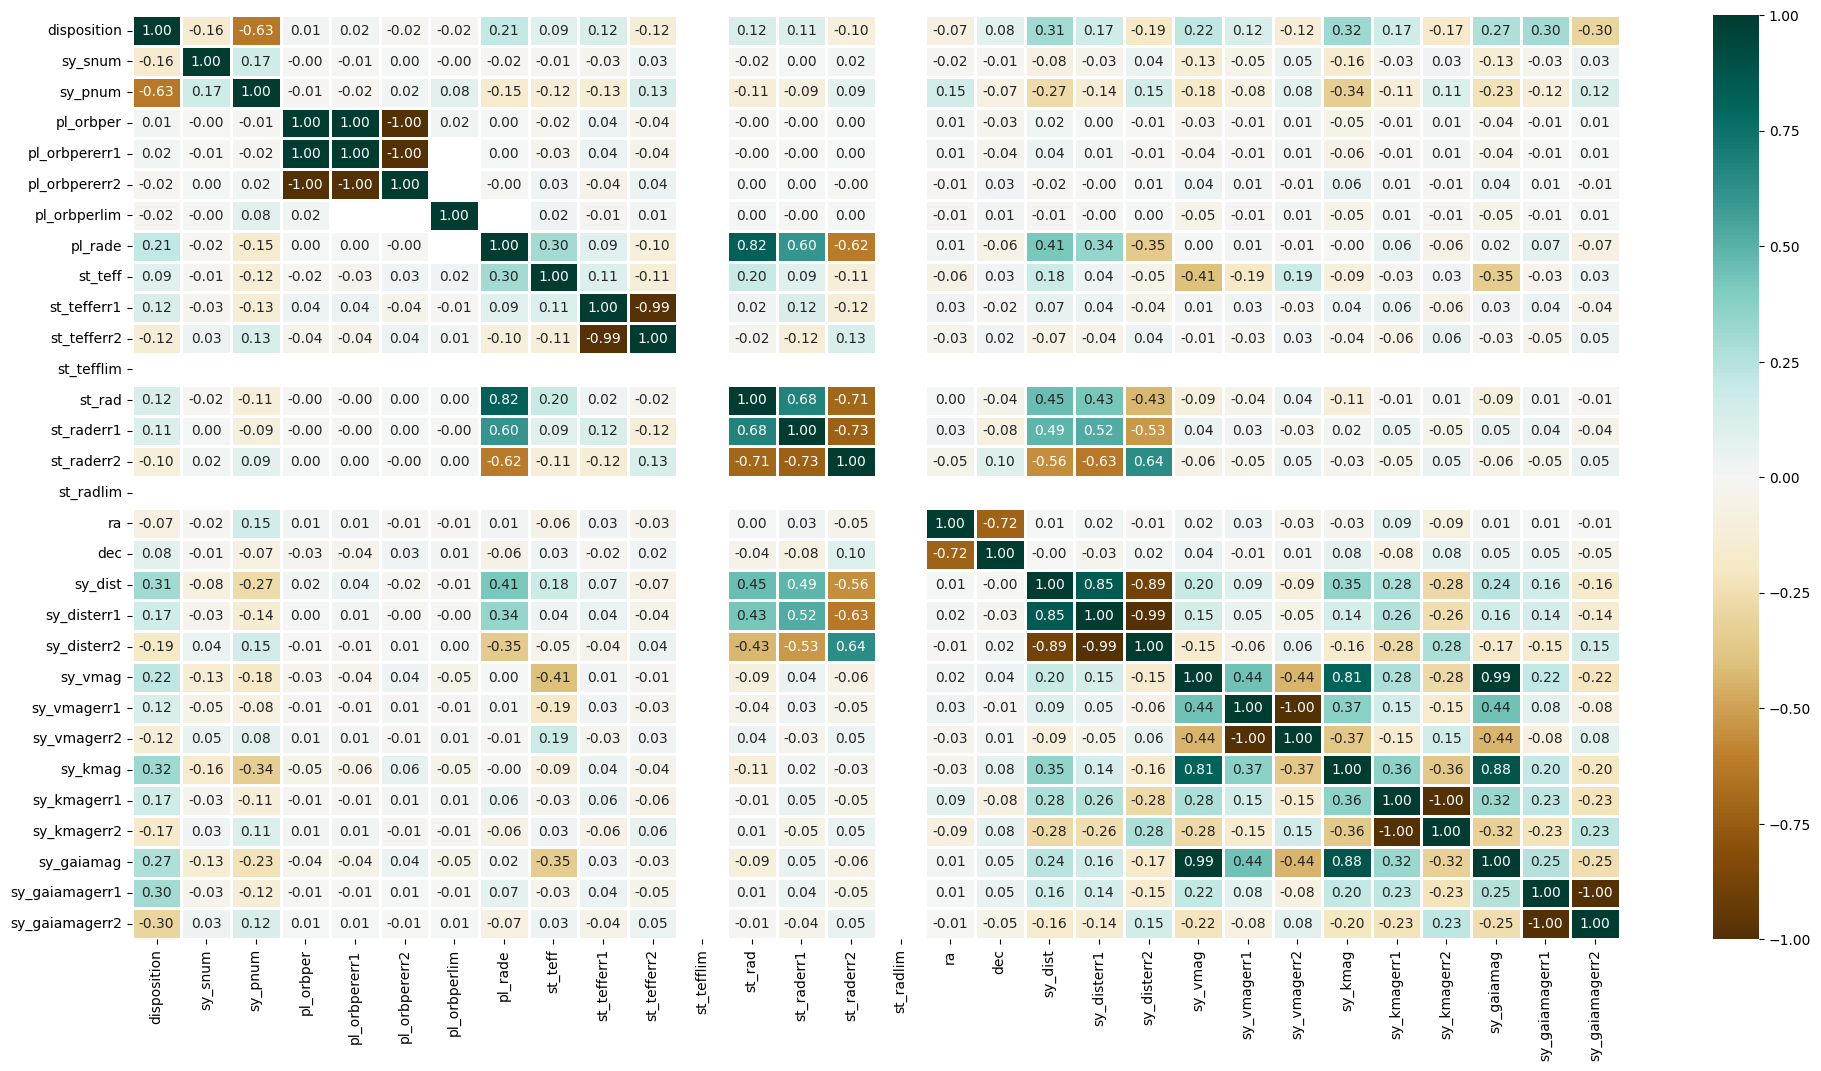

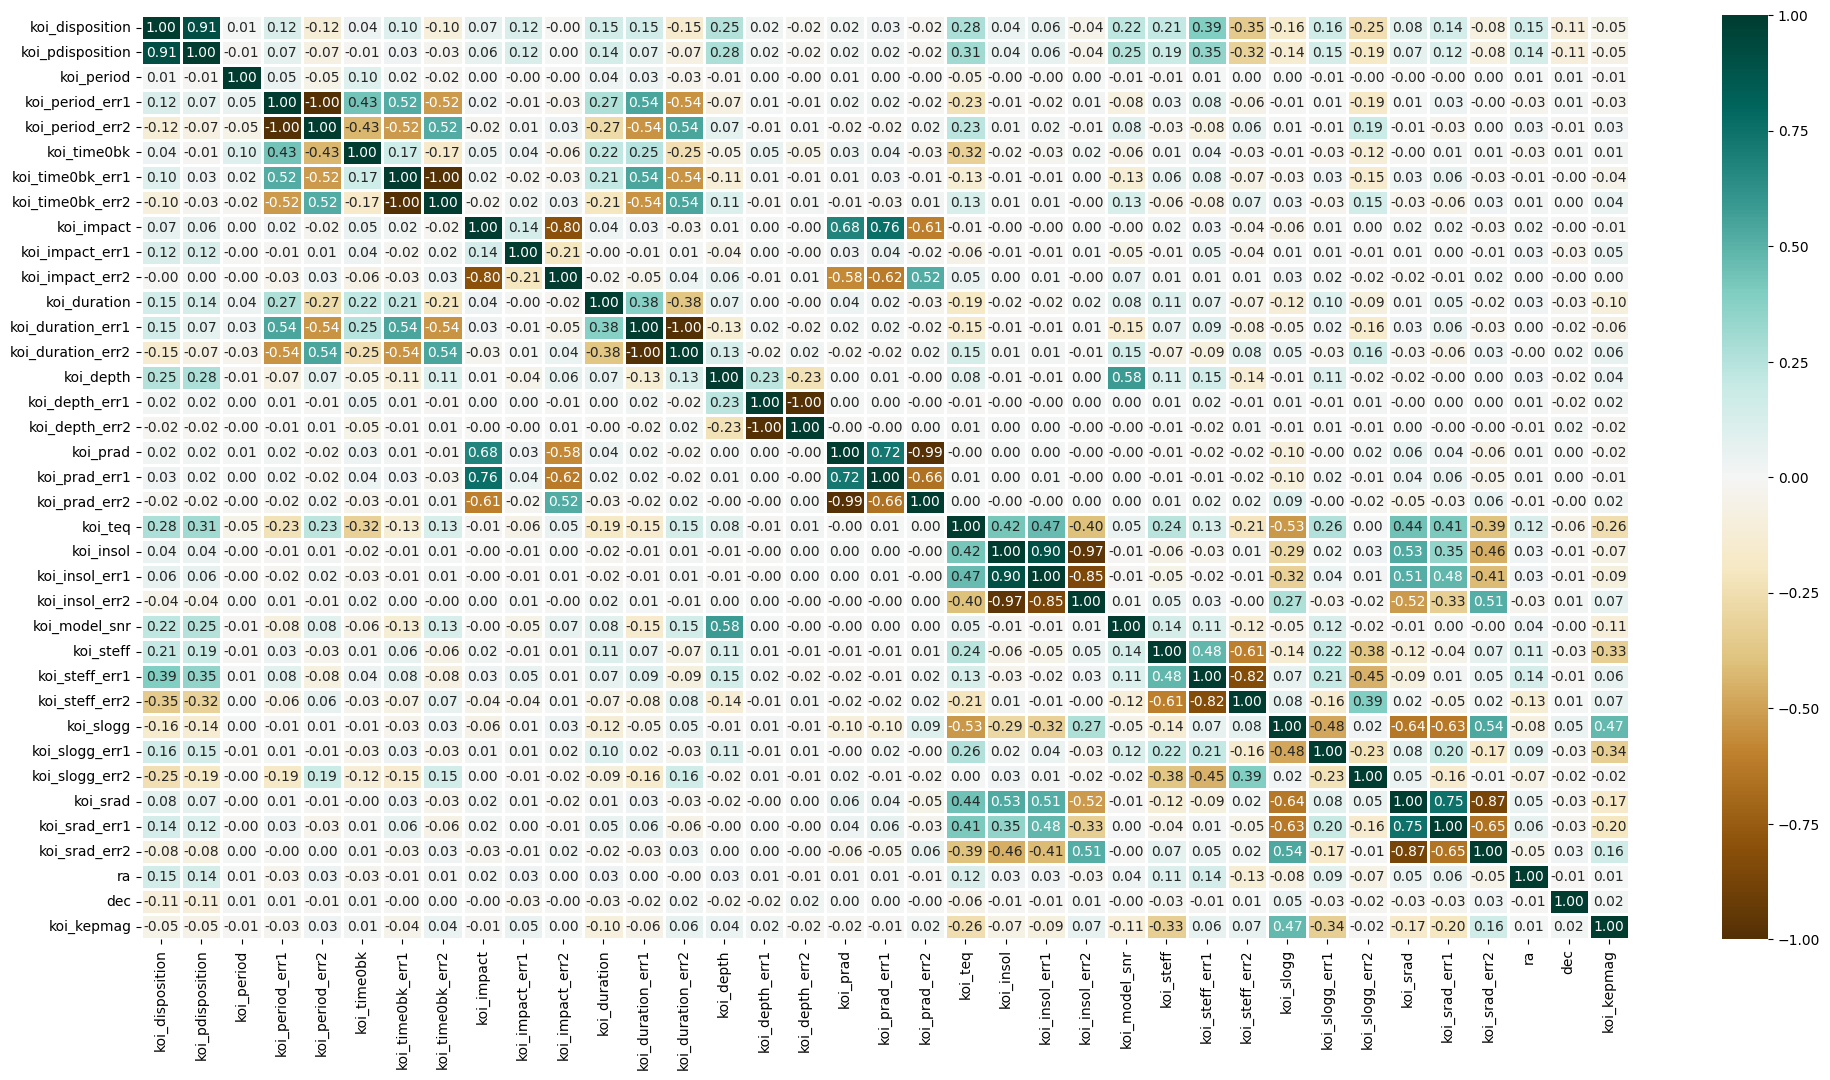

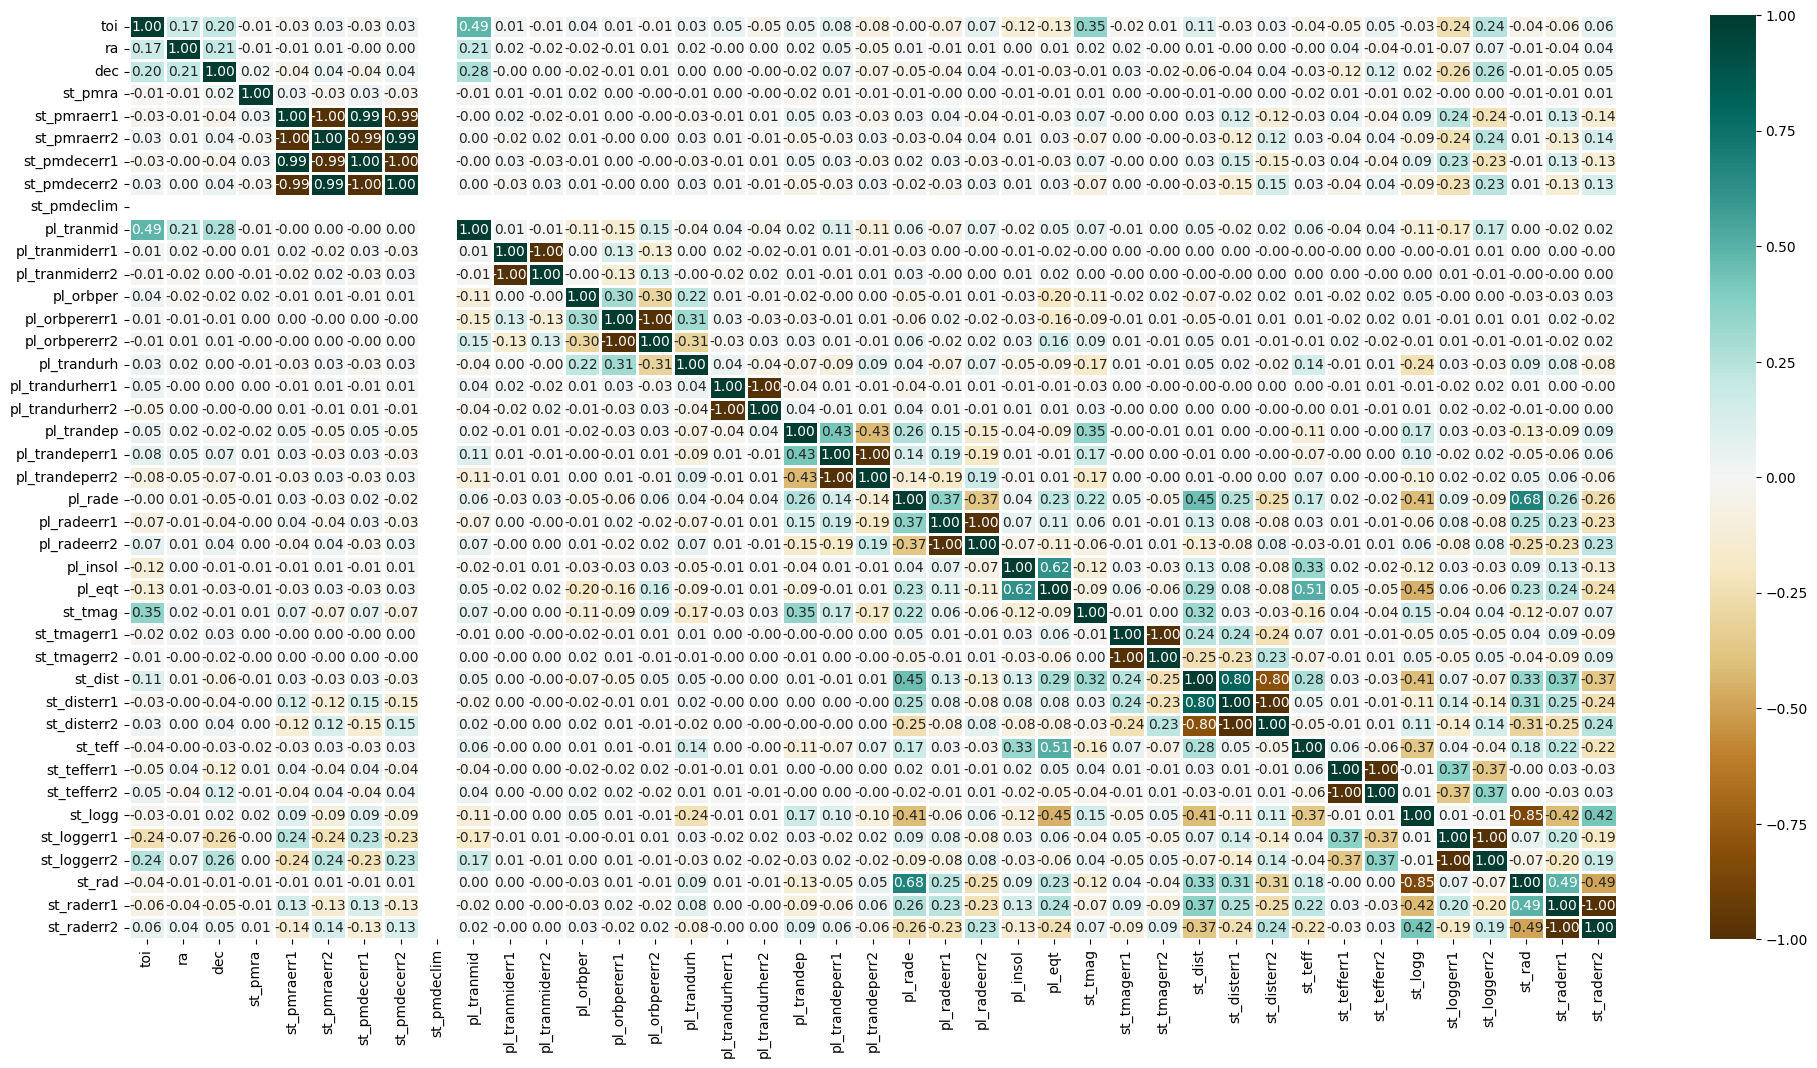

In [21]:
koi_dataset_cleaned = pd.read_csv("koi_dataset_cleaned.csv", comment="#", na_values=["NaN", "NULL", "-1"])
toi_dataset_cleaned = pd.read_csv("toi_dataset_cleaned.csv", comment="#", na_values=["NaN", "NULL", "-1"])
k2_dataset_cleaned = pd.read_csv("k2_dataset_cleaned.csv", comment="#", na_values=["NaN", "NULL", "-1"])

plt.figure(figsize=(24,12))

sns.heatmap(k2_dataset_cleaned.select_dtypes(include=['number']).corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

plt.figure(figsize=(24,12))

sns.heatmap(koi_dataset_cleaned.select_dtypes(include=['number']).corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

plt.figure(figsize=(24,12))

sns.heatmap(toi_dataset_cleaned.select_dtypes(include=['number']).corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

In [ ]:

"""
Calculate transit depth for k2 dataset, as it is missing from the values
"""
R_SUN_TO_EARTH = 109.076  # 1 solar radius = 109.076 Earth radii

# Ensure columns exist
if "pl_rade" in k2_cleaned.columns and "st_rad" in k2_cleaned.columns:
    # Compute transit depth (in ppm)
    k2_cleaned["transit_depth_ppm"] = ((k2_cleaned["pl_rade"] / (k2_cleaned["st_rad"] * R_SUN_TO_EARTH)) ** 2) * 1e6

    print("Transit depth (ppm) calculated and added as 'transit_depth_ppm'")
else:
    print("Columns 'pl_rade' or 'st_rad' not found in dataset.")


k2_cleaned.to_csv("k2_dataset_cleaned.csv")



Transit depth (ppm) calculated and added as 'transit_depth_ppm'


In [ ]:
import pandas as pd

# Define mapping of columns for each dataset to standard column names
columns_mapping = {
    'koi': {
        'kepoi_name': 'name',
        'koi_disposition': 'disposition',
        'koi_period': 'orbital_period',
        'koi_srad': 'stellar_rad',
        'ra': 'rate_of_ascension',
        'dec': 'declination',
        'koi_duration': 'transit_duration',
        'koi_depth': 'transit_depth',
        'koi_prad': 'planet_radius',
        'koi_teq': 'planet_temperature',
        'koi_insol': 'insolation flux',
        'koi_steff' : 'stellar_temperature',
        'koi_srad' : 'stellar_radius'
    },
    'toi': {
        'toi': 'name',
        'tfopwg_disp': 'disposition',
        'pl_orbper': 'orbital_period',
        'st_rad': 'stellar_rad',
        'ra': 'rate_of_ascension',
        'dec': 'declination',
        'pl_trandurh': 'transit_duration',
        'pl_trandep': 'transit_depth',
        'pl_rade': 'planet_radius',
        'pl_eqt': 'planet_temperature',
        'pl_insol': 'insolation flux',
        'st_teff' : 'stellar_temperature',
        'st_rad' : 'stellar_radius'
    },
    'k2': {
        'pl_name': 'name',
        'disposition': 'disposition',
        'pl_orbper': 'orbital_period',
        'st_rad': 'stellar_rad',
        'ra': 'rate_of_ascension',
        'dec': 'declination',
        'pl_trandur': 'transit_duration',
        'transit_depth_ppm': 'transit_depth',
        'pl_rade': 'planet_radius',
        'pl_eqt': 'planet_temperature',
        'pl_insol': 'insolation flux',
        'st_teff' : 'stellar_temperature',
        'st_rad' : 'stellar_radius'
    }
}

# Load datasets
koi_df = pd.read_csv("koi_dataset_cleaned.csv")
toi_df = pd.read_csv("toi_dataset_cleaned.csv")
#k2_df = pd.read_csv("k2_dataset.csv")

# Keep only desired columns and rename them
koi_df = koi_df[list(columns_mapping['koi'].keys())].rename(columns=columns_mapping['koi'])
toi_df = toi_df[list(columns_mapping['toi'].keys())].rename(columns=columns_mapping['toi'])
#k2_df = k2_df[list(columns_mapping['k2'].keys())].rename(columns=columns_mapping['k2'])

# Combine all datasets
combined_df = pd.concat([koi_df, toi_df], ignore_index=True)
combined_df.to_csv("combined_dataset.csv", index=False)

# Save to a new CSV

print("Datasets combined successfully. Saved as combined_dataset.csv")


Datasets combined successfully. Saved as combined_dataset.csv


In [ ]:
# Converting the radiuses to meters for log 10 conversion:
combined_df['planet_radius'] = combined_df['planet_radius'] * 6.378e+6
combined_df['stellar_radius'] = combined_df['stellar_radius'] * 6.957e+8

combined_df = combined_df[combined_df['disposition'] != "APC"]
combined_df = combined_df[combined_df['disposition'] != "FA"]

print(combined_df.head(10))

combined_df.to_csv("combined_dataset.csv", index=False)



        name  disposition  orbital_period  stellar_radius  rate_of_ascension  \
0  K00752.01            1        9.488036    6.449139e+08          291.93423   
1  K00752.02            1       54.418383    6.449139e+08          291.93423   
2  K00753.01            2       19.899140    6.038676e+08          297.00482   
3  K00754.01            3        1.736952    5.502987e+08          285.53461   
4  K00755.01            1        2.525592    7.277022e+08          288.75488   
5  K00756.01            1       11.094321    6.762204e+08          296.28613   
6  K00756.02            1        4.134435    6.762204e+08          296.28613   
7  K00756.03            1        2.566589    6.762204e+08          296.28613   
8  K00114.01            3        7.361790    1.362181e+09          298.86435   
9  K00757.01            1       16.068647    5.899536e+08          286.99948   

   declination  transit_duration  transit_depth  planet_radius  \
0    48.141651           2.95750          615.8     1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler

df = pd.read_csv("combined_dataset.csv")
print(df.head(10))

log_columns = [
    "orbital_period",
    "stellar_radius",
    "transit_duration",
    "transit_depth",
    "planet_radius",
    "planet_temperature",
    "insolation flux",
    "stellar_temperature"
]

# === Apply log10 transform ===
for col in log_columns:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: np.log10(x) if pd.notna(x) and x > 0 else np.nan)
    else:
        print(f"⚠️ Column '{col}' not found, skipping log transform.")

# === Separate features and target ===
if "disposition" in df.columns:
    y = df["disposition"]
    X = df.drop(columns=["disposition"])
else:
    y = None
    X = df.copy()

# === Identify numeric columns in X only ===
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# === Apply RobustScaler ===
scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X[numeric_cols]), columns=numeric_cols)

# === Combine back with disposition (if it exists) ===
if y is not None:
    df_scaled = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)
else:
    df_scaled = X_scaled

# === Save the result ===
df_scaled.to_csv("combined_dataset_scaled.csv", index=False)

print("✅ Log10 + Robust scaling complete. Saved as 'combined_dataset_scaled.csv'.")


        name  disposition  orbital_period  stellar_radius  rate_of_ascension  \
0  K00752.01            1        9.488036    6.449139e+08          291.93423   
1  K00752.02            1       54.418383    6.449139e+08          291.93423   
2  K00753.01            2       19.899140    6.038676e+08          297.00482   
3  K00754.01            3        1.736952    5.502987e+08          285.53461   
4  K00755.01            1        2.525592    7.277022e+08          288.75488   
5  K00756.01            1       11.094321    6.762204e+08          296.28613   
6  K00756.02            1        4.134435    6.762204e+08          296.28613   
7  K00756.03            1        2.566589    6.762204e+08          296.28613   
8  K00114.01            3        7.361790    1.362181e+09          298.86435   
9  K00757.01            1       16.068647    5.899536e+08          286.99948   

   declination  transit_duration  transit_depth  planet_radius  \
0    48.141651           2.95750          615.8     1

In [ ]:
from sklearn.impute import KNNImputer


df_imputed = df_scaled.copy()
num_cols = df_imputed.drop(columns=["disposition"]).columns

print(df_imputed.isna().sum())
for cls in df_imputed["disposition"].unique():
    mask = df_imputed["disposition"] == cls
    imputer = KNNImputer(n_neighbors=5)
    df_imputed.loc[mask, num_cols] = imputer.fit_transform(df_imputed.loc[mask, num_cols])
print(df_imputed.isna().sum())
df_imputed.to_csv("combined_imputed_values.csv", index=False)

orbital_period          99
stellar_radius         823
rate_of_ascension        0
declination              0
transit_duration         0
transit_depth          364
planet_radius          822
planet_temperature     626
insolation flux        484
stellar_temperature    511
disposition              0
dtype: int64
orbital_period         0
stellar_radius         0
rate_of_ascension      0
declination            0
transit_duration       0
transit_depth          0
planet_radius          0
planet_temperature     0
insolation flux        0
stellar_temperature    0
disposition            0
dtype: int64


Dataset Loaded Successfully
Shape: (16707, 11)
Columns: ['orbital_period', 'stellar_radius', 'rate_of_ascension', 'declination', 'transit_duration', 'transit_depth', 'planet_radius', 'planet_temperature', 'insolation flux', 'stellar_temperature', 'disposition']


,orbital_period,stellar_radius,rate_of_ascension,declination,transit_duration,transit_depth,planet_radius,planet_temperature,insolation flux,stellar_temperature,disposition
0,0.262587,-0.229285,0.025560,0.249964,-0.116759,-0.198142,-0.374226,-0.292762,-0.269936,-0.363298,1
1,1.170629,-0.229285,0.025560,0.249964,0.392202,-0.088202,-0.261838,-0.983393,-0.976989,-0.363298,1
2,0.647626,-0.341517,0.079542,0.249675,-0.728662,0.699696,0.558036,-0.550729,-0.533295,0.082791,2
3,-0.620101,-0.500053,-0.042571,0.255476,-0.365882,0.607962,0.972449,0.377198,0.414339,0.030628,3
4,-0.425491,-0.023166,-0.008288,0.253210,-0.818484,-0.204564,-0.276167,0.386514,0.425759,0.272565,1


,count,mean,std,min,25%,50%,75%,max
orbital_period,16707.0,0.174422,0.867487,-1.847574,-0.400661,0.003640,0.602958,5.214471
stellar_radius,16707.0,0.177373,0.966066,-3.882531,-0.376035,0.018737,0.623628,9.180248
rate_of_ascension,16707.0,-0.482344,0.931628,-3.081485,-0.938352,0.000000,0.061648,0.749565
declination,16707.0,-0.615150,1.448517,-5.033455,-0.810099,0.000000,0.189901,1.821987
transit_duration,16707.0,0.045491,0.866470,-4.998554,-0.491925,0.000000,0.508075,4.530613
transit_depth,16707.0,0.086609,0.663407,-2.279401,-0.413077,-0.008041,0.578765,2.252395
planet_radius,16707.0,0.092578,0.674238,-2.043758,-0.448477,0.039277,0.535712,5.318533
planet_temperature,16707.0,-0.074730,0.773180,-4.393167,-0.552589,0.000000,0.461515,3.167823
insolation flux,16707.0,-0.078060,0.780767,-4.069919,-0.562638,-0.005268,0.451993,3.271995
stellar_temperature,16707.0,-0.140250,1.106380,-4.910430,-0.572246,-0.001097,0.413823,13.670828



Missing Values per Column:
 orbital_period         0
stellar_radius         0
rate_of_ascension      0
declination            0
transit_duration       0
transit_depth          0
planet_radius          0
planet_temperature     0
insolation flux        0
stellar_temperature    0
disposition            0
dtype: int64


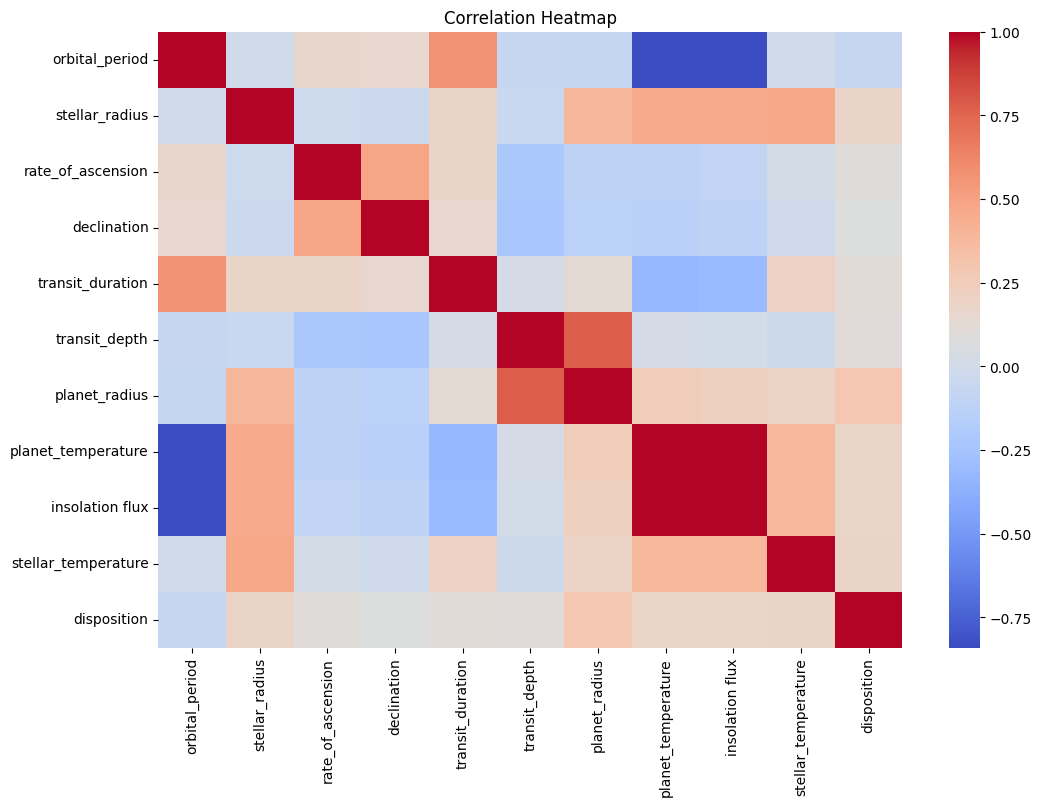

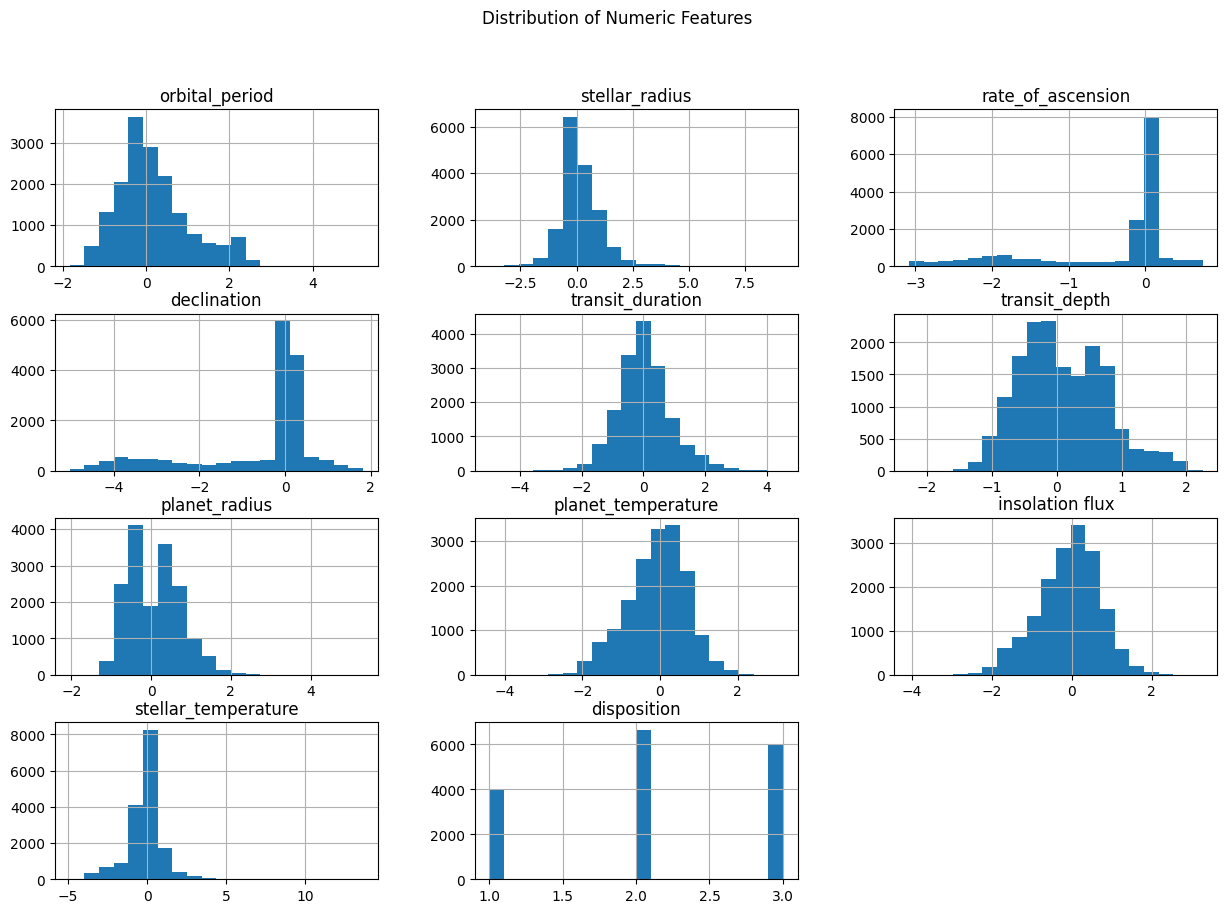

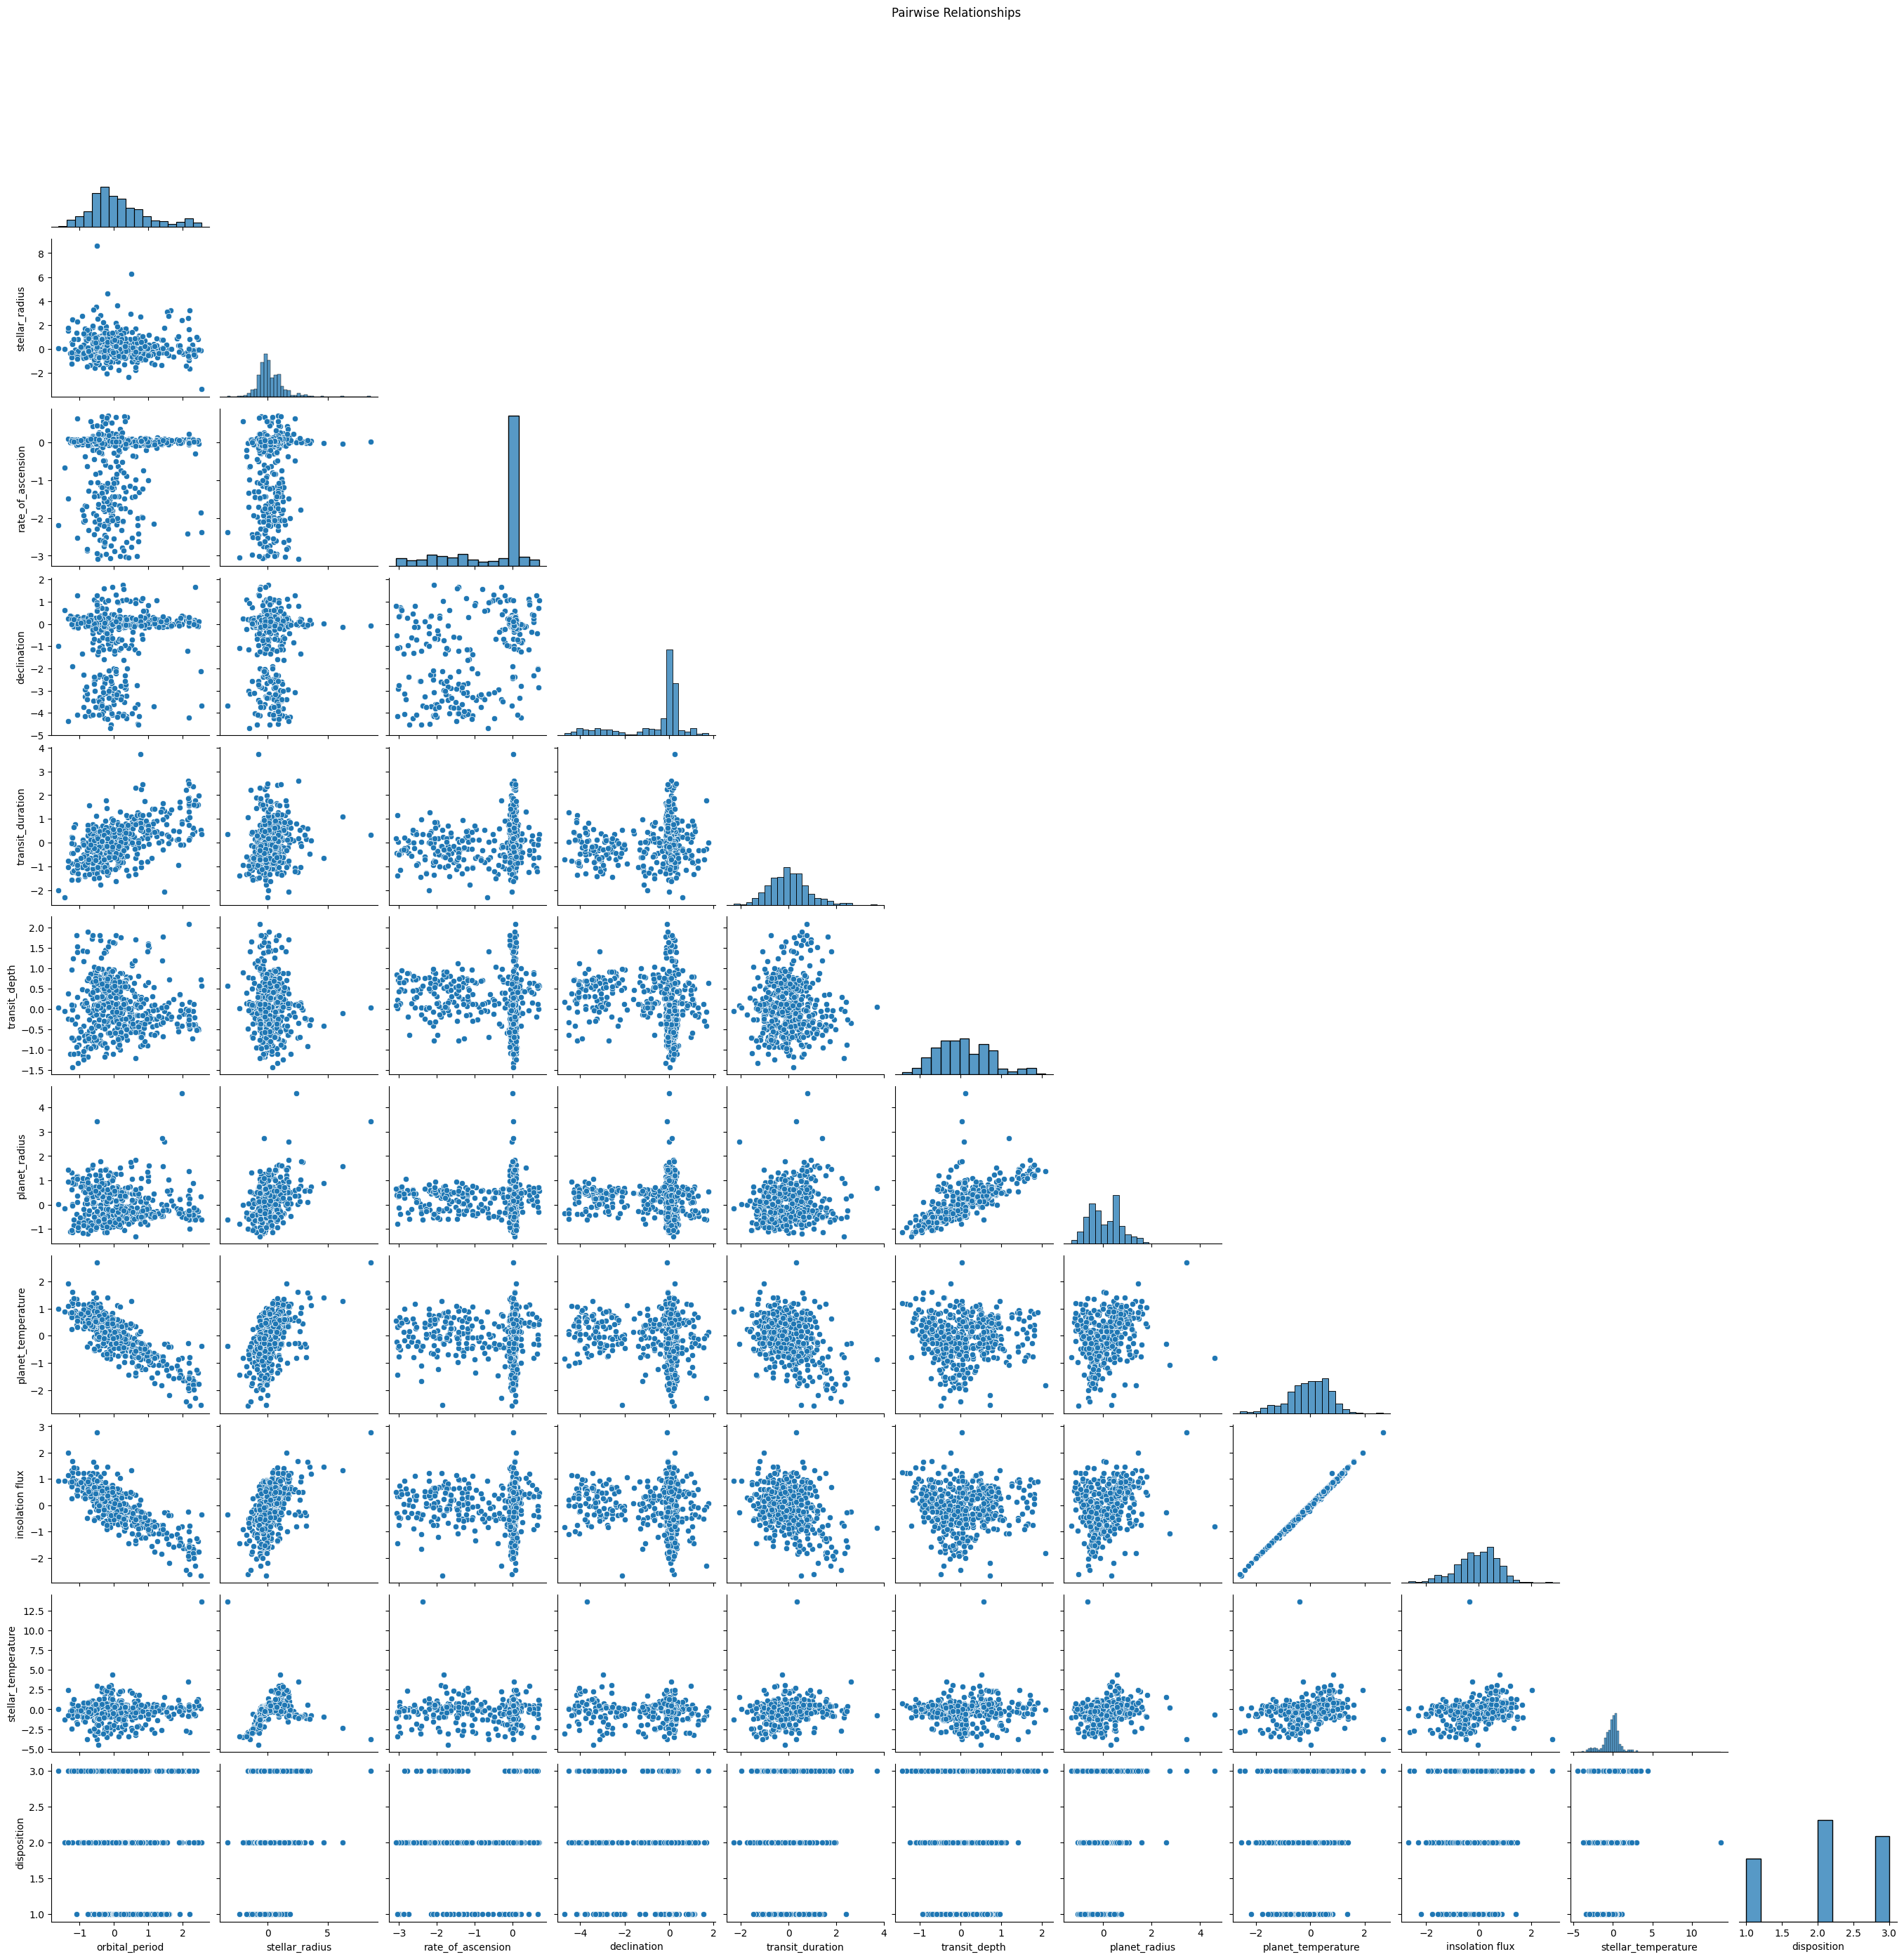

No target-like column detected.


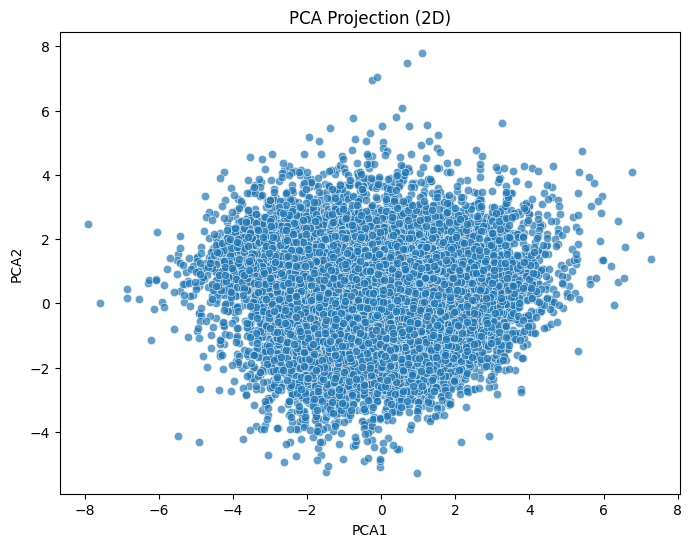

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ---------------------------------------------
# 1. Load Dataset
# ---------------------------------------------
file_path = "combined_imputed_values.csv"  # Adjust this if needed
df = pd.read_csv(file_path)

print("Dataset Loaded Successfully")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# ---------------------------------------------
# 2. Basic Overview
# ---------------------------------------------
display(df.head())
display(df.describe().T)
print("\nMissing Values per Column:\n", df.isna().sum())

# ---------------------------------------------
# 3. Correlation Heatmap
# ---------------------------------------------
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# ---------------------------------------------
# 4. Distribution of Numeric Columns
# ---------------------------------------------
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle("Distribution of Numeric Features")
plt.show()

# ---------------------------------------------
# 5. Pairplot (Sampled for Performance)
# ---------------------------------------------
if df.shape[0] > 1000:
    sns.pairplot(df.sample(500), corner=True)
else:
    sns.pairplot(df, corner=True)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

# ---------------------------------------------
# 6. Correlation with Target (if any)
# ---------------------------------------------
target_candidates = [c for c in df.columns if 'target' in c.lower() or 'label' in c.lower()]
if target_candidates:
    target = target_candidates[0]
    corr_with_target = df.corr(numeric_only=True)[target].sort_values(ascending=False)
    corr_with_target.drop(target, inplace=True)
    corr_with_target.plot(kind='bar', figsize=(10, 5), color='steelblue')
    plt.title(f"Correlation with {target}")
    plt.show()
else:
    print("No target-like column detected.")

# ---------------------------------------------
# 7. PCA Visualization
# ---------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.select_dtypes(include=np.number))

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=df_pca, alpha=0.7)
plt.title("PCA Projection (2D)")
plt.show()